In [100]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import requests

In [92]:
locations = pd.read_csv('Neighborhoods_Lat_Lon.csv')
locations.drop(locations.columns[[0]],axis = 1,inplace = True)  #mantém a coluna com o nome
latlon = locations.drop(['Neighborhood'], axis = 'columns')
locations
#latlon

,Neighborhood,Latitude,Longitude
0,Armory Park,32.215319,-110.965878
1,Barrio Viejo,32.214224,-110.973130
2,Central,32.227055,-110.971783
3,Civano,32.147808,-110.764803
4,Congress Street,32.222333,-110.966709
5,Convention,32.218581,-110.974439
6,Downtown,32.215691,-110.962312
7,Eastside,32.236059,-110.830288
8,El Encanto,32.241355,-110.848053
9,El Presidio,32.225158,-110.976240


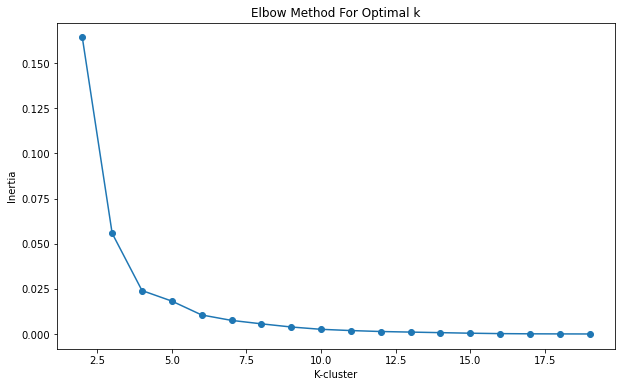

In [26]:
# Lista de valores de K
Kclusters = range(2, 20)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Kclusters:
    modelo = KMeans(n_clusters = K, random_state = 100)
    modelo.fit(latlon)
    valores_metrica.append(modelo.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(Kclusters, valores_metrica, 'o-')
plt.xlabel("K-cluster")
plt.ylabel("Inertia")
plt.title('Elbow Method For Optimal k')
plt.show()

Olhando pelo mapa, acho que 12 clusters vai dar uma distribuição mais uniforme.

In [168]:
modelo = KMeans(n_clusters = 11, random_state = 100)
cneigh = modelo.fit(latlon)

In [169]:
clusters = modelo.fit_predict(latlon)
centers = modelo.cluster_centers_

In [170]:
clst = [*range(0,11)]
clst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [171]:
df_clst = pd.DataFrame(centers, columns = ['Lat','Lon']) 
df_clst.insert(2, 'Cluster', clst)
df_clst

,Lat,Lon,Cluster
0,32.229098,-110.935407,0
1,34.897006,-82.452947,1
2,32.044750,-110.712940,2
3,32.241355,-110.848053,3
4,32.222333,-110.966709,4
5,32.147808,-110.764803,5
6,32.143406,-110.945758,6
7,32.271535,-110.927806,7
8,32.188343,-110.972267,8
9,32.260881,-110.886013,9


In [36]:
from geopy.geocoders import Nominatim
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML     
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # plotting library


In [46]:
address = 'Tucson, AZ'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitudec = location.latitude
longitudec = location.longitude
print(latitudec, longitudec)

32.2228765 -110.9748477


In [93]:
map_tucson_ng = folium.Map(location=[latitudec, longitudec], zoom_start=10)

for lat, lon, label in zip(locations['Latitude'], locations['Longitude'], locations['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_ng)  


for lat, lon, label in zip(df_clst['Lat'], df_clst['Lon'], df_clst['Cluster']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_ng)  


map_tucson_ng

map_tucson_ng

Fazendo a chamada na API do Foursquare a partir das coordenadas dos centroides de cada cluster

In [112]:
CLIENT_ID = 'KJT5OD0JG2PAAXCJOSEJWIO30SBOJRGU01SF0MY3KI2F0CRX' # your Foursquare ID
CLIENT_SECRET = 'CUI3DJJ1P20EZ2SEWIHEJ5QM14P2WGFUIUNHIR5FGUPOZSNA' # your Foursquare Secret
ACCESS_TOKEN = '2AP4OUHY5DDCDQ4TRHOATIJOV5JZ2MO4BY2WJX01FCKDWQ0O' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 200
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KJT5OD0JG2PAAXCJOSEJWIO30SBOJRGU01SF0MY3KI2F0CRX
CLIENT_SECRET:CUI3DJJ1P20EZ2SEWIHEJ5QM14P2WGFUIUNHIR5FGUPOZSNA


In [113]:
results_lista = []     #Descomentar linha do request quando for rodar
radius = 1000

for index in df_clst.index:
    latitude = df_clst['Lat'][index]
    longitude = df_clst['Lon'][index]
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, radius, LIMIT)
    results_lista.append(requests.get(url).json())    
#results_lista

In [106]:
results_lista

[{'meta': {'code': 200, 'requestId': '6082c74dbd1da232f074bd09'},
  'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
  'response': {'venues': [{'id': '4b30e398f964a5208dfc24e3',
     'name': 'Rincon Market',
     'location': {'address': '2513 E 6th St',
      'crossStreet': 'Tucson Blvd.',
      'lat': 32.228051432767536,
      'lng': -110.93486366859203,
      'labeledLatLngs': [{'label': 'display',
        'lat': 32.228051432767536,
        'lng': -110.93486366859203},
       {'label': 'entrance', 'lat': 32.228044, 'lng': -110.934966}],
      'distance': 127,
      'postalCode': '85716',
      'cc': 'US',
      'city': 'Tucson',
      'state': 'AZ',
      'country': 'United States',
      'formattedAddress': ['2513 E 6th St (Tucson Blvd.)',
       'Tucson, AZ 85716',
       'United States']},
     'categories': [{'id': '4bf58dd8d48988d146941735',
       'name': 'Deli / Bodega',
       'pluralName': 'Delis / Bodegas',
       'shortName': 'Deli / Bodega',
  

In [114]:
venues_total = pd.DataFrame(columns = ['IDN','ID','Name','Categories','CatID','Lat','Lon','Distance'])
indneig = 0
for item in results_lista:   #for within neighborhoods
    venues = (item['response']['venues'])
    for item2 in venues:   #for within venues
        ID = item2['id']
        Name = item2['name']
        Cat = item2['categories']
        Lati = item2['location']['lat']
        Long = item2['location']['lng']
        Dist = item2['location']['distance']
        try:
            Cat1 = item2['categories'][0]['name']
            Catid = item2['categories'][0]['id']
        except:
            Cat1 = "NaN"
            Catid ="NaN"
        venues_total = venues_total.append({'IDN':indneig,'ID':ID, 'Name':Name,'Categories':Cat1,'CatID':Catid,'Lat':Lati,'Lon':Long,'Distance':Dist},ignore_index=True)
    indneig = indneig+1 
venues_total.head()

,IDN,ID,Name,Categories,CatID,Lat,Lon,Distance
0,0,4b30e398f964a5208dfc24e3,Rincon Market,Deli / Bodega,4bf58dd8d48988d146941735,32.228051,-110.934864,127
1,0,4ba8f1d9f964a5207ffc39e3,Sparkle Cleaners,Laundry Service,4bf58dd8d48988d1fc941735,32.228130,-110.935570,108
2,0,4aa46739f964a520b24620e3,Bob Dobb's,Bar,4bf58dd8d48988d116941735,32.228122,-110.935136,111
3,0,4df40567aeb7170aa2f34ca7,The Condo,Residential Building (Apartment / Condo),4d954b06a243a5684965b473,32.227559,-110.930360,505
4,0,607e06ed5c512970d7aa8261,Flora’s Market Run,Grocery Store,4bf58dd8d48988d118951735,32.228076,-110.935044,118


In [115]:
len(venues_total)

1208

In [116]:
venues_total.to_csv('Venues_L200_R1000.csv')

Abrindo e concatenando as buscas

In [117]:
df1 = pd.read_csv('Venues_L200_R1000.csv')
df2 = pd.read_csv('Venues_L100_R2000.csv')
#df3 = pd.read_csv('Venues_L100_R1500.csv')
#df4 = pd.read_csv('Venues_L200_R500.csv')

In [121]:
frames = [df1,df2]  #df3, df4] 

In [124]:
df_total = pd.concat(frames, sort=False)

In [125]:
df_total

,Unnamed: 0,IDN,ID,Name,Categories,CatID,Lat,Lon,Distance
0,0,0,4b30e398f964a5208dfc24e3,Rincon Market,Deli / Bodega,4bf58dd8d48988d146941735,32.228051,-110.934864,127
1,1,0,4ba8f1d9f964a5207ffc39e3,Sparkle Cleaners,Laundry Service,4bf58dd8d48988d1fc941735,32.228130,-110.935570,108
2,2,0,4aa46739f964a520b24620e3,Bob Dobb's,Bar,4bf58dd8d48988d116941735,32.228122,-110.935136,111
3,3,0,4df40567aeb7170aa2f34ca7,The Condo,Residential Building (Apartment / Condo),4d954b06a243a5684965b473,32.227559,-110.930360,505
4,4,0,607e06ed5c512970d7aa8261,Flora’s Market Run,Grocery Store,4bf58dd8d48988d118951735,32.228076,-110.935044,118
...,...,...,...,...,...,...,...,...,...
1203,1203,10,511e54fae4b07d9c22b25a34,American Mobility,NaN,NaN,32.249052,-110.977693,622
1204,1204,10,50460fe7e4b03986a6998120,Sharp's Transmissions,Automotive Shop,4bf58dd8d48988d124951735,32.248873,-110.979508,450
1205,1205,10,4dcc64941f6ed1a1835530d6,Sound Fx Car Audio Video Security,Auto Workshop,56aa371be4b08b9a8d5734d3,32.252258,-110.977708,750
1206,1206,10,4c81775047cc224b34a67c9f,"Larry's Engine & Marine, Inc.",Boat or Ferry,4bf58dd8d48988d12d951735,32.244143,-110.980922,569


In [126]:
df_total.drop(df_total.columns[[0]],axis = 1,inplace = True)  #mantém a coluna com o nome
df_total

,IDN,ID,Name,Categories,CatID,Lat,Lon,Distance
0,0,4b30e398f964a5208dfc24e3,Rincon Market,Deli / Bodega,4bf58dd8d48988d146941735,32.228051,-110.934864,127
1,0,4ba8f1d9f964a5207ffc39e3,Sparkle Cleaners,Laundry Service,4bf58dd8d48988d1fc941735,32.228130,-110.935570,108
2,0,4aa46739f964a520b24620e3,Bob Dobb's,Bar,4bf58dd8d48988d116941735,32.228122,-110.935136,111
3,0,4df40567aeb7170aa2f34ca7,The Condo,Residential Building (Apartment / Condo),4d954b06a243a5684965b473,32.227559,-110.930360,505
4,0,607e06ed5c512970d7aa8261,Flora’s Market Run,Grocery Store,4bf58dd8d48988d118951735,32.228076,-110.935044,118
...,...,...,...,...,...,...,...,...
1203,10,511e54fae4b07d9c22b25a34,American Mobility,NaN,NaN,32.249052,-110.977693,622
1204,10,50460fe7e4b03986a6998120,Sharp's Transmissions,Automotive Shop,4bf58dd8d48988d124951735,32.248873,-110.979508,450
1205,10,4dcc64941f6ed1a1835530d6,Sound Fx Car Audio Video Security,Auto Workshop,56aa371be4b08b9a8d5734d3,32.252258,-110.977708,750
1206,10,4c81775047cc224b34a67c9f,"Larry's Engine & Marine, Inc.",Boat or Ferry,4bf58dd8d48988d12d951735,32.244143,-110.980922,569


In [128]:
df_catg = pd.read_csv('Group_category.csv')
df_catg.drop(df_catg.columns[[0]],axis = 1,inplace = True)
df_catg

,Group,Category,CatID
0,Arts & Entertainment,Amphitheater,56aa371be4b08b9a8d5734db
1,Arts & Entertainment,Aquarium,4fceea171983d5d06c3e9823
2,Arts & Entertainment,Arcade,4bf58dd8d48988d1e1931735
3,Arts & Entertainment,Art Gallery,4bf58dd8d48988d1e2931735
4,Arts & Entertainment,Bowling Alley,4bf58dd8d48988d1e4931735
...,...,...,...
465,Travel & Transport,Tram Station,52f2ab2ebcbc57f1066b8b51
466,Travel & Transport,Transportation Service,54541b70498ea6ccd0204bff
467,Travel & Transport,Travel Lounge,4f04b25d2fb6e1c99f3db0c0
468,Travel & Transport,Truck Stop,57558b36e4b065ecebd306dd


In [129]:
mergeresult = pd.merge(df_total, df_catg, how="inner", on=["CatID"])   #1704 x 11
mergeresult

,IDN,ID,Name,Categories,CatID,Lat,Lon,Distance,Group,Category
0,0,4b30e398f964a5208dfc24e3,Rincon Market,Deli / Bodega,4bf58dd8d48988d146941735,32.228051,-110.934864,127,Food,Deli / Bodega
1,6,4f32869319836c91c7e05c8b,Hot Dogs Obregon,Deli / Bodega,4bf58dd8d48988d146941735,32.145931,-110.955589,968,Food,Deli / Bodega
2,0,4b30e398f964a5208dfc24e3,Rincon Market,Deli / Bodega,4bf58dd8d48988d146941735,32.228051,-110.934864,127,Food,Deli / Bodega
3,6,4f32869319836c91c7e05c8b,Hot Dogs Obregon,Deli / Bodega,4bf58dd8d48988d146941735,32.145931,-110.955589,968,Food,Deli / Bodega
4,0,4ba8f1d9f964a5207ffc39e3,Sparkle Cleaners,Laundry Service,4bf58dd8d48988d1fc941735,32.228130,-110.935570,108,Shop & Service,Laundry Service
...,...,...,...,...,...,...,...,...,...,...
1743,10,51011a90e412ebb4a4415ddc,Prime Transportation,Airport,4bf58dd8d48988d1ed931735,32.250555,-110.977664,665,Travel & Transport,Airport
1744,10,4c81775047cc224b34a67c9f,"Larry's Engine & Marine, Inc.",Boat or Ferry,4bf58dd8d48988d12d951735,32.244143,-110.980922,569,Travel & Transport,Boat or Ferry
1745,10,4c81775047cc224b34a67c9f,"Larry's Engine & Marine, Inc.",Boat or Ferry,4bf58dd8d48988d12d951735,32.244143,-110.980922,569,Travel & Transport,Boat or Ferry
1746,10,4dcc64941f6ed1a1835530d6,Sound Fx Car Audio Video Security,Auto Workshop,56aa371be4b08b9a8d5734d3,32.252258,-110.977708,750,Shop & Service,Auto Workshop


In [130]:
mergeclean = mergeresult.drop_duplicates(subset=['ID'],keep='first')
mergeclean

,IDN,ID,Name,Categories,CatID,Lat,Lon,Distance,Group,Category
0,0,4b30e398f964a5208dfc24e3,Rincon Market,Deli / Bodega,4bf58dd8d48988d146941735,32.228051,-110.934864,127,Food,Deli / Bodega
1,6,4f32869319836c91c7e05c8b,Hot Dogs Obregon,Deli / Bodega,4bf58dd8d48988d146941735,32.145931,-110.955589,968,Food,Deli / Bodega
4,0,4ba8f1d9f964a5207ffc39e3,Sparkle Cleaners,Laundry Service,4bf58dd8d48988d1fc941735,32.228130,-110.935570,108,Shop & Service,Laundry Service
5,1,4daf1cd50437710b8142f9a6,Grandma's Laundry Room,Laundry Service,4bf58dd8d48988d1fc941735,34.902926,-82.455233,691,Shop & Service,Laundry Service
6,7,4d6c03cac27aa35d15fa0812,Laundrymat,Laundry Service,4bf58dd8d48988d1fc941735,32.264756,-110.931736,840,Shop & Service,Laundry Service
...,...,...,...,...,...,...,...,...,...,...
1738,10,4b08cbf3f964a5205a1223e3,Curves Cabaret,Strip Club,4bf58dd8d48988d1d6941735,32.247896,-110.977350,652,Nightlife Spot,Strip Club
1740,10,4b6a2715f964a5207bca2be3,Century Park Movie Theater,Movie Theater,4bf58dd8d48988d17f941735,32.246544,-110.986685,308,Arts & Entertainment,Movie Theater
1742,10,51011a90e412ebb4a4415ddc,Prime Transportation,Airport,4bf58dd8d48988d1ed931735,32.250555,-110.977664,665,Travel & Transport,Airport
1744,10,4c81775047cc224b34a67c9f,"Larry's Engine & Marine, Inc.",Boat or Ferry,4bf58dd8d48988d12d951735,32.244143,-110.980922,569,Travel & Transport,Boat or Ferry


In [131]:
map_tucson_venues = folium.Map(location=[latitudec, longitudec], zoom_start=10)
for lat, lon, label in zip(mergeclean['Lat'], mergeclean['Lon'], mergeclean['Group']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_venues)  
for lat, lon, label in zip(df_clst['Lat'], df_clst['Lon'], df_clst['Cluster']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tucson_venues)  


map_tucson_venues

Começa a preparação dos dados para a clusterização

In [139]:
df_gr_ne_total = mergeclean.drop(columns = (['ID','Name','Categories','CatID','Lat','Lon','Distance','Category'])) 
df_gr_ne = (df_gr_ne_total.groupby(['IDN','Group'])['IDN'].count()).to_frame() #Group by category in neighbourhood
df_gr_ne = df_gr_ne.unstack()
df_gr_ne = df_gr_ne['IDN']
df_gr_ne = df_gr_ne.fillna(0)
df_gr_ne


Group,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
IDN,,,,,,,,,
0,1.0,1.0,8.0,2.0,1.0,9.0,6.0,13.0,1.0
1,2.0,3.0,12.0,2.0,7.0,11.0,2.0,38.0,2.0
2,4.0,0.0,11.0,1.0,17.0,13.0,5.0,16.0,5.0
3,5.0,0.0,9.0,1.0,6.0,20.0,7.0,42.0,2.0
4,12.0,0.0,26.0,22.0,2.0,5.0,3.0,9.0,7.0
5,3.0,0.0,6.0,1.0,30.0,13.0,3.0,32.0,2.0
6,1.0,0.0,11.0,2.0,5.0,33.0,4.0,32.0,1.0
7,2.0,0.0,9.0,1.0,9.0,20.0,9.0,44.0,0.0
8,1.0,1.0,20.0,1.0,3.0,17.0,1.0,44.0,2.0


In [217]:
sums = df_gr_ne.select_dtypes(pd.np.number).sum()
df_norm = df_gr_ne.div(sums)
df_norm

<ipython-input-217-70a7eb67c1ad>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  sums = df_gr_ne.select_dtypes(pd.np.number).sum()


Group,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
IDN,,,,,,,,,
0,0.027778,0.2,0.062992,0.050,0.010989,0.050000,0.146341,0.039634,0.038462
1,0.055556,0.6,0.094488,0.050,0.076923,0.061111,0.048780,0.115854,0.076923
2,0.111111,0.0,0.086614,0.025,0.186813,0.072222,0.121951,0.048780,0.192308
3,0.138889,0.0,0.070866,0.025,0.065934,0.111111,0.170732,0.128049,0.076923
4,0.333333,0.0,0.204724,0.550,0.021978,0.027778,0.073171,0.027439,0.269231
5,0.083333,0.0,0.047244,0.025,0.329670,0.072222,0.073171,0.097561,0.076923
6,0.027778,0.0,0.086614,0.050,0.054945,0.183333,0.097561,0.097561,0.038462
7,0.055556,0.0,0.070866,0.025,0.098901,0.111111,0.219512,0.134146,0.000000
8,0.027778,0.2,0.157480,0.025,0.032967,0.094444,0.024390,0.134146,0.076923


In [151]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

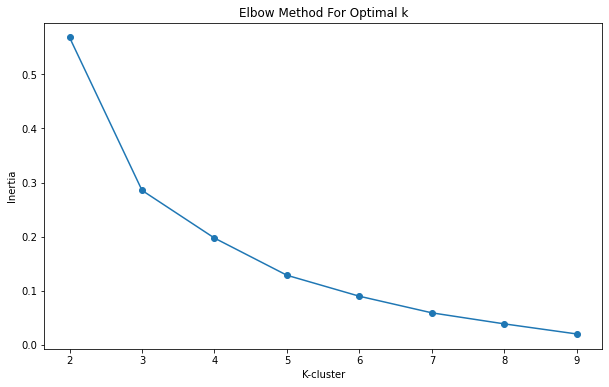

In [144]:
# Lista de valores de K
Kclusters = range(2, 10)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Kclusters:
    modelo = KMeans(n_clusters = K, random_state = 100)
    modelo.fit(df_norm)
    valores_metrica.append(modelo.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(Kclusters, valores_metrica, 'o-')
plt.xlabel("K-cluster")
plt.ylabel("Inertia")
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4755256628944391
For n_clusters = 3 The average silhouette_score is : 0.4304109618578083
For n_clusters = 4 The average silhouette_score is : 0.18963767587093966
For n_clusters = 5 The average silhouette_score is : 0.1961539041423009
For n_clusters = 6 The average silhouette_score is : 0.1792442171313032
For n_clusters = 7 The average silhouette_score is : 0.18087632180667212
For n_clusters = 8 The average silhouette_score is : 0.14209007755669195
For n_clusters = 9 The average silhouette_score is : 0.09939600494826704


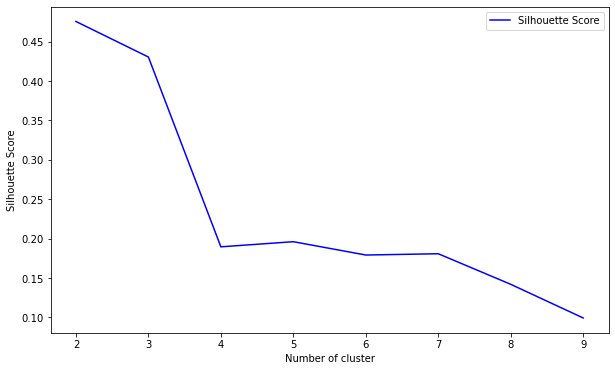

In [152]:
#range_n_clusters = [2, 3, 4, 5, 6,7,8]
range_n_clusters = range(2, 10)
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
    clusterer = KMeans(n_clusters = n_clusters, random_state=100)
    cluster_labels = clusterer.fit_predict(df_norm)
   #Finding the average silhouette score
    silhouette_avg = silhouette_score(df_norm, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    
fig = plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

Escolha: 3 clusters

In [189]:
model = KMeans(n_clusters = 3, init='k-means++', n_init=10, max_iter = 300)
clusters = model.fit_predict(df_norm)
centers = model.cluster_centers_

In [214]:
df_clstv = pd.DataFrame(df_clst, columns = ['Lat','Lon']) 
df_clstv.insert(2, 'Cluster', clusters)
df_clstv

,Lat,Lon,Cluster
0,32.229098,-110.935407,2
1,34.897006,-82.452947,2
2,32.044750,-110.712940,2
3,32.241355,-110.848053,0
4,32.222333,-110.966709,0
5,32.147808,-110.764803,0
6,32.143406,-110.945758,0
7,32.271535,-110.927806,1
8,32.188343,-110.972267,1
9,32.260881,-110.886013,1


Entendendo os clusters

In [215]:
df_cls = df_norm.insert(0, 'Cluster', clst)
#df_cls = df_cls.insert(0, 'Cluster', clst)

In [216]:
df_norm

Group,Cluster,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
IDN,,,,,,,,,,
0,0,0.027778,0.2,0.062992,0.050,0.010989,0.050000,0.146341,0.039634,0.038462
1,1,0.055556,0.6,0.094488,0.050,0.076923,0.061111,0.048780,0.115854,0.076923
2,2,0.111111,0.0,0.086614,0.025,0.186813,0.072222,0.121951,0.048780,0.192308
3,3,0.138889,0.0,0.070866,0.025,0.065934,0.111111,0.170732,0.128049,0.076923
4,4,0.333333,0.0,0.204724,0.550,0.021978,0.027778,0.073171,0.027439,0.269231
5,5,0.083333,0.0,0.047244,0.025,0.329670,0.072222,0.073171,0.097561,0.076923
6,6,0.027778,0.0,0.086614,0.050,0.054945,0.183333,0.097561,0.097561,0.038462
7,7,0.055556,0.0,0.070866,0.025,0.098901,0.111111,0.219512,0.134146,0.000000
8,8,0.027778,0.2,0.157480,0.025,0.032967,0.094444,0.024390,0.134146,0.076923


In [196]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [ ]:
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [ ]:
map_tus_cls = folium.Map(location=[latitudec, longitudec], zoom_start=10)

for lat, lon, label in zip(df_clstv['Latitude'], df_clstv['Longitude'], df_clstv['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tus_cls)  
    
map_tus_cls